In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pathlib
from sklearn.metrics import accuracy_score
import numpy as np
%load_ext tensorboard
import datetime
import matplotlib.pyplot as plt

Mounted at /content/drive


Here we load the dataset so we can use it to build the model

In [ ]:

data_dir = "/content/drive/MyDrive/dataset461"

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)




Found 1156 files belonging to 9 classes.
Using 925 files for training.
Found 1156 files belonging to 9 classes.
Using 231 files for validation.


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1)
])


train_ds_original = train_ds

# Create augmented dataset
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

# Combine original and augmented datasets
combined_train_ds = train_ds_original.concatenate(augmented_train_ds)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
class_names = train_ds.class_names
print(class_names)
combined_train_ds = combined_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2

In [ ]:
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [ ]:

num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape = (img_height, img_width,3)),
  feature_extractor_layer,
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

#model.summary()


In [ ]:


model.compile(
  optimizer= 'adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [ ]:
NUM_EPOCHS = 20

history = model.fit(combined_train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


58/58 [==============================] - 260s 2s/step - loss: 1.2995 - accuracy: 0.5849 - val_loss: 0.6283 - val_accuracy: 0.8442
Epoch 2/20
58/58 [==============================] - 76s 1s/step - loss: 0.5716 - accuracy: 0.8562 - val_loss: 0.4302 - val_accuracy: 0.8874
Epoch 3/20
58/58 [==============================] - 75s 1s/step - loss: 0.4110 - accuracy: 0.9016 - val_loss: 0.3410 - val_accuracy: 0.9091
Epoch 4/20
58/58 [==============================] - 88s 2s/step - loss: 0.3349 - accuracy: 0.9216 - val_loss: 0.2915 - val_accuracy: 0.9307
Epoch 5/20
58/58 [==============================] - 78s 1s/step - loss: 0.2830 - accuracy: 0.9335 - val_loss: 0.2898 - val_accuracy: 0.9177
Epoch 6/20
58/58 [==============================] - 80s 1s/step - loss: 0.2515 - accuracy: 0.9384 - val_loss: 0.2604 - val_accuracy: 0.9221
Epoch 7/20
58/58 [==============================] - 80s 1s/step - loss: 0.2203 - accuracy: 0.9524 - val_loss: 0.2533 - val_accuracy: 0.9221
Epoch 8/20
58/58 [============

In [ ]:
test_data_dir = "/content/drive/MyDrive/test_dataset461"

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 502 files belonging to 9 classes.


hi
1/1 [==============================] - 2s 2s/step
hi
1/1 [==============================] - 2s 2s/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 2s 2s/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 2s 2s/step
hi
1/1 [==============================] - 2s 2s/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 1s 981ms/step
hi
1/1 [==============================] - 1s 1s/step
hi
1/1 [==============================] - 1s 961ms/step
hi
1/1 [==============================] - 1s 978ms/step
hi
1/1 [==============================] - 1s 1s/step
Accuracy: 0.9442231075697212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
     

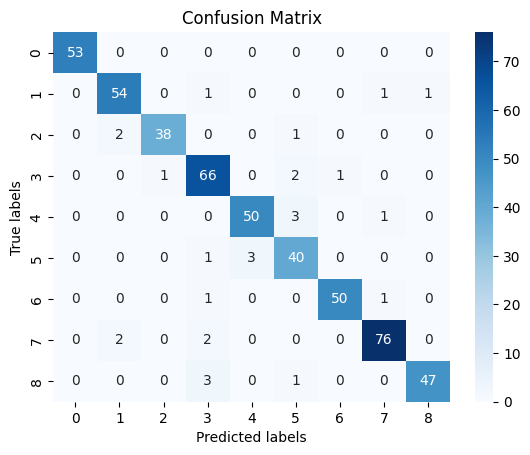

In [ ]:


# Convert predictions to class names


true_labels = []
predicted_labels = []

for images, labels in test_ds:
    print("hi")
    true_labels.extend(labels.numpy())  # Get true labels
    predictions = model.predict(images)  # Get predictions
    predicted_labels.extend([np.argmax(pred) for pred in predictions])  # Get predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

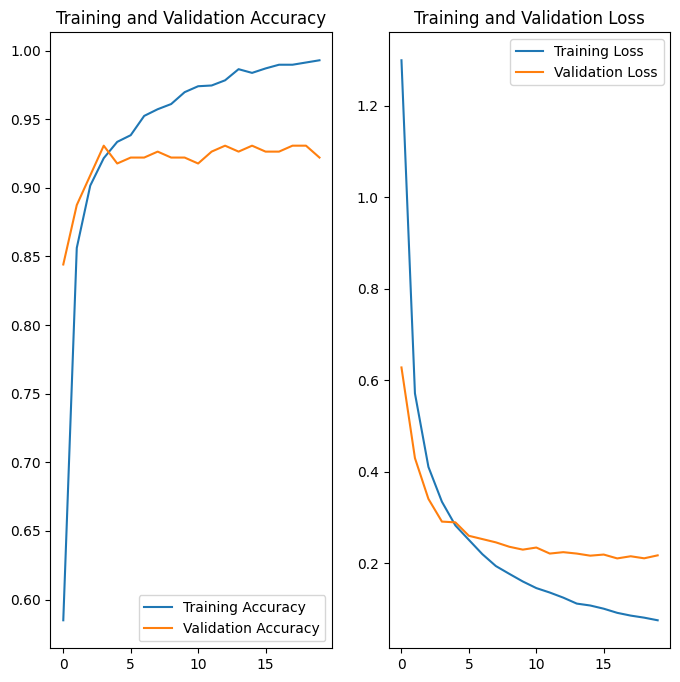

In [ ]:



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()